# Skewness

In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
from post_processing_tools import *
import os
import glob

In [157]:
data = get_output("output_log/analysis_11_apr.txt")

Text(0, 0.5, '$S$')

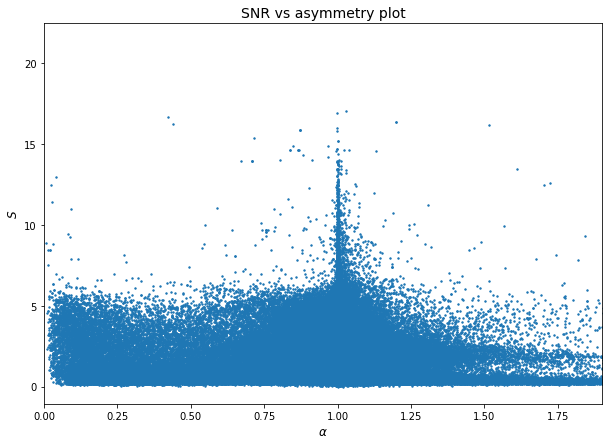

In [161]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(data.asym_score, abs(data.snr), s=2)
ax.set_xlim(-0, 1.9)
#ax.set_ylim(-1, 30)
ax.set_title("SNR vs asymmetry plot", fontsize=14)
ax.set_xlabel("$\\alpha$", fontsize=12)
ax.set_ylabel("$S$", fontsize=12)

---

In [65]:
data.tail()

,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob
1723708,tesslc_120751897.pkl,-6.791756,-3.580600,1469.161446,-2.000000,-2.000000,-2.000000,0.312504,-2.000000,0.052036,-0.503,-2.000000,-2.000000,end
1723709,tesslc_93333293.pkl,-6.938065,-1.931934,1474.827680,0.997541,0.426554,0.013729,0.812489,-0.000304,0.160588,-0.282,-0.198130,60.317621,maybeTransit
1723710,tesslc_168195934.pkl,-8.728827,-2.676383,1469.328413,-2.000000,-2.000000,-2.000000,0.666673,-2.000000,0.246664,-0.131,-2.000000,-2.000000,end
1723711,tesslc_261399508.pkl,-6.058511,-1.761306,1475.218109,0.998519,0.274892,0.221497,0.791670,-0.001950,0.075808,-0.675,0.004580,109613.665735,maybeTransit
1723712,tesslc_157339062.pkl,-2.345670,-1.968568,1475.034371,1.012229,0.691971,0.441273,0.291672,-0.001080,0.020633,-0.737,-76.594847,415.829570,maybeTransit


In [92]:
cand = data.loc[(abs(data.snr) >= 5) & (data.transit_prob == 'maybeTransit') & (abs(data.skewness) >= 0.5)].reset_index()

In [93]:
cand

,index,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob
0,708,tesslc_88871602.pkl,-11.387594,-5.177445,1484.079003,1.023185,0.050566,0.044135,0.145831,-0.012790,0.164798,0.930,0.912057,4.258542e-01,maybeTransit
1,1319,tesslc_49701947.pkl,-9.814050,-5.256418,1487.347896,1.017086,0.039709,0.037397,0.083334,-0.010859,0.081019,-0.289,0.856483,6.821167e-01,maybeTransit
2,1406,tesslc_300329385.pkl,-15.170154,-5.497995,1476.739580,0.954250,0.166443,0.128343,0.354171,-0.006300,0.069833,-0.332,-50.456742,1.886492e+02,maybeTransit
3,1972,tesslc_287977675.pkl,-18.106236,-5.563959,1476.718194,0.773696,0.217282,0.148866,0.375008,-0.015266,0.074599,-0.151,-1350.895028,0.000000e+00,maybeTransit
4,2032,tesslc_397148815.pkl,-18.209774,-6.184557,1476.718255,1.184909,0.302644,0.125482,0.395841,-0.009834,0.075290,-0.028,-4653.902891,3.836952e+06,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,1721794,tesslc_393456645.pkl,-20.939285,-12.227175,1483.888399,1.003315,0.039633,0.020124,0.083333,-0.020670,0.038520,0.275,-0.528685,7.490368e-01,maybeTransit
4686,1722716,tesslc_746425948.pkl,-26.064255,-9.649221,1476.431731,0.755983,0.181507,0.059894,0.270837,-0.077479,0.034659,0.568,-1.283051,6.738803e-01,maybeTransit
4687,1723062,tesslc_300556947.pkl,-12.164192,-5.104227,1476.718805,0.868692,0.176263,0.137164,0.375005,-0.005338,0.049733,-0.484,1.200025,2.105185e+00,maybeTransit
4688,1723107,tesslc_397186868.pkl,-17.300968,-5.837243,1476.759827,0.994541,0.189319,0.143455,0.291672,-0.018373,0.075208,-0.173,-55.571880,5.172864e+02,maybeTransit


In [35]:
path = '/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/'

## Some candidates

88871602
. -11.38759422 -5.17744451 1484.07900345 1.02318514 0.05056634 0.04413455 0.14583149 -0.01279011 0.16479772 0.93 0.91205717 0.4258542 maybeTransit


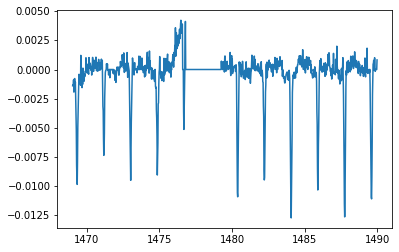

49701947
. -9.81404972 -5.25641763 1487.34789564 1.01708596 0.03970938 0.0373969 0.08333353 -0.01085947 0.08101944 -0.289 0.85648347 0.6821167 maybeTransit


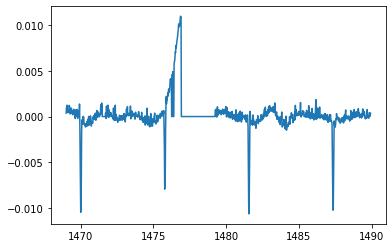

300329385
. -15.17015362 -5.49799516 1476.73957954 0.95424959 0.16644293 0.12834259 0.35417113 -0.00629965 0.06983303 -0.332 -50.45674153 188.64915841 maybeTransit


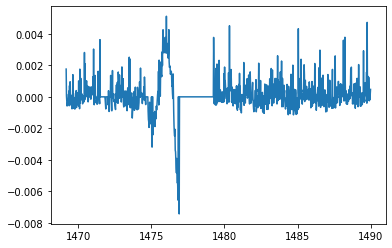

287977675
. -18.1062355 -5.5639593 1476.71819429 0.77369581 0.21728219 0.14886633 0.37500759 -0.01526627 0.07459937 -0.151 -1350.89502832 0.0 maybeTransit


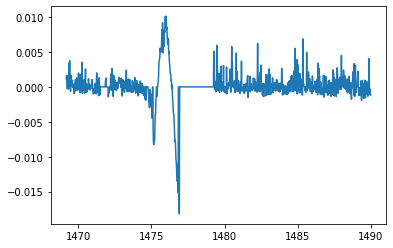

397148815
. -18.20977402 -6.18455692 1476.71825537 1.18490865 0.30264353 0.12548227 0.39584144 -0.00983396 0.07528968 -0.028 -4653.90289062 3836952.03042382 maybeTransit


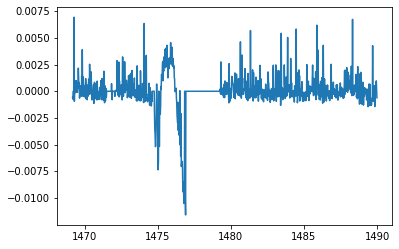

427353041
. -10.34272861 -5.24318606 1469.51598352 1.00367115 0.04858445 0.03293307 0.10416446 -0.03024636 0.16688626 0.815 0.53092925 0.70986132 maybeTransit


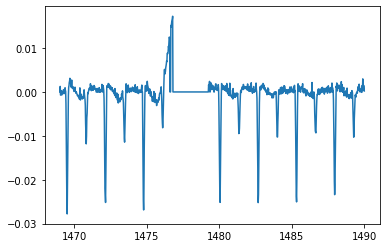

93124397
. -11.81020355 -6.70947929 1485.82736523 1.12035039 0.03982804 0.02664205 0.08333201 -0.01172768 0.06532177 0.148 -1.34015641 0.41152861 maybeTransit


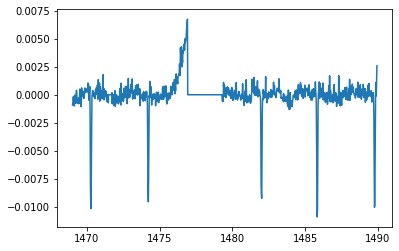

118793635
. -12.68971062 -6.75686312 1486.20338928 1.04000531 0.04868355 0.03728483 0.1250009 -0.01080147 0.06570247 -0.116 1.4946609 0.66963969 maybeTransit


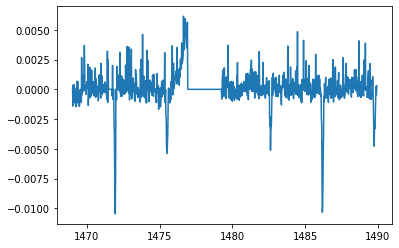

123901018
. -20.51942062 -5.07985409 1476.53583953 4.78758215 0.48304646 0.00036945 0.77082863 -0.00446826 0.18373166 0.87 -12466.23903643 12558730.79095238 maybeTransit


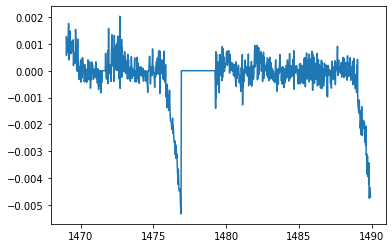

300508749
. -13.48002338 -5.03306258 1476.73959432 0.9372268 0.25041358 0.15801557 0.3541713 -0.00692643 0.06809759 -0.276 -1227.42568822 189740.59069146 maybeTransit


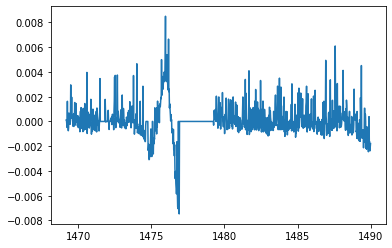

127233318
. -15.96000576 -6.65817586 1475.20413583 1.03200559 0.06741386 0.05123293 0.16666334 -0.05458386 0.06955908 0.791 0.77848664 0.21859359 maybeTransit


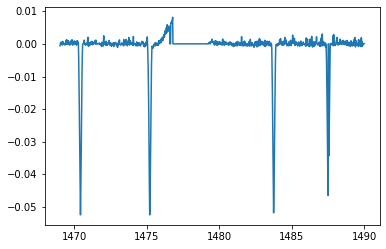

397187261
. -22.01690674 -6.3303049 1476.71819879 1.05365578 0.26950094 0.12951709 0.39584126 -0.01071824 0.09740682 0.207 -172.73371505 2424.8976798 maybeTransit


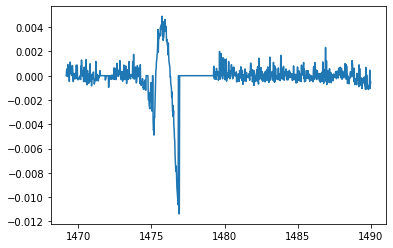

237462775
. -11.04566288 -6.35037555 1469.64105432 1.003707 0.03866916 0.01615746 0.08333432 -0.01520059 0.08022869 0.693 0.69334204 0.89131591 maybeTransit


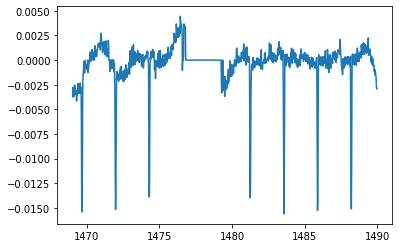

143079876
. -4.0563755 -6.15937669 1472.30755637 -3 -3 -3 0.06249981 -3 0.40860449 -0.018 -3 -3 maybeTransit


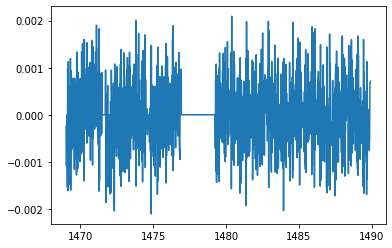

48605350
. -13.31303501 -6.80274614 1474.95246015 1.02460346 0.04810989 0.03467694 0.1041676 -0.01391751 0.1148901 0.556 -0.8482197 0.49203732 maybeTransit


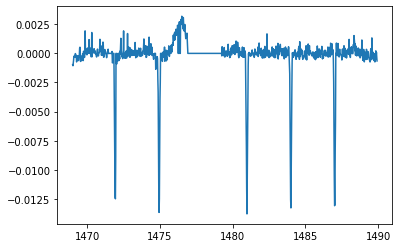

374909077
. -10.97660542 -8.13392618 1472.2403287 1.74432534 0.01234579 0.06044873 0.08333321 -0.01041084 0.03136381 -0.291 3741.53858106 13206697.27499204 maybeTransit


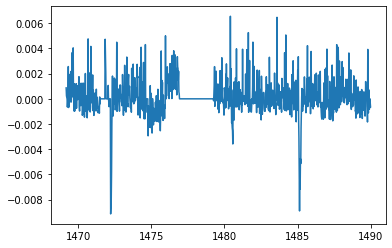

397136642
. -18.92114258 -5.64979527 1476.71818136 0.99378501 0.21018255 0.13840836 0.37500722 -0.01751549 0.08392331 -0.007 -61.24826066 444.64519494 maybeTransit


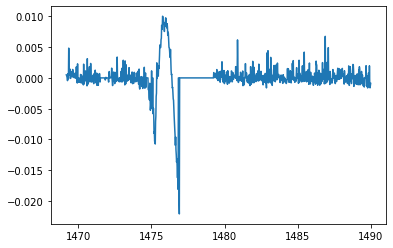

281980239
. -17.88218498 -5.79251091 1476.71819675 1.01134068 0.24381409 0.1407971 0.37500724 -0.01003702 0.07470517 -0.043 -280.48147471 17183.19250872 maybeTransit


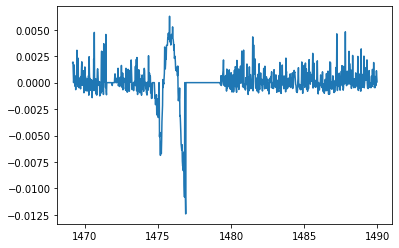

143077962
. -22.74436188 -5.82281628 1476.22426722 1.02499137 0.35441496 0.09483428 0.624998 -0.0105408 0.1614388 0.337 -1.75750715 0.55409798 maybeTransit


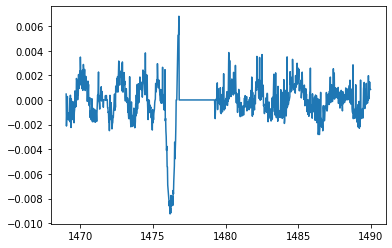

397148792
. -20.0210495 -6.2235464 1476.69742188 1.18881483 0.28939041 0.12036241 0.41667522 -0.006969 0.0657895 0.084 -89.48432197 997.65081304 maybeTransit


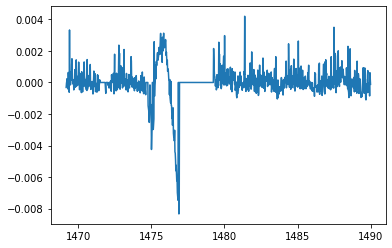

In [115]:
for i in range(len(cand.tail(20))):    
    lc_path = glob.glob(os.path.join(path,f"**/{cand.file[i]}"))[0]
    lc, lc_info = import_XRPlightcurve(lc_path,sector=6)
    print(lc_info[0])
    lc = lc['time','corrected flux','quality','flux error']
    results, data_arrays = processing(lc, lc_info=lc_info,method='median')
    plt.plot(data_arrays[0], data_arrays[1])
    plt.show()

In [99]:
import lightkurve as lk

In [110]:
d = lk.search_lightcurve("TIC 143077962")[0].download()

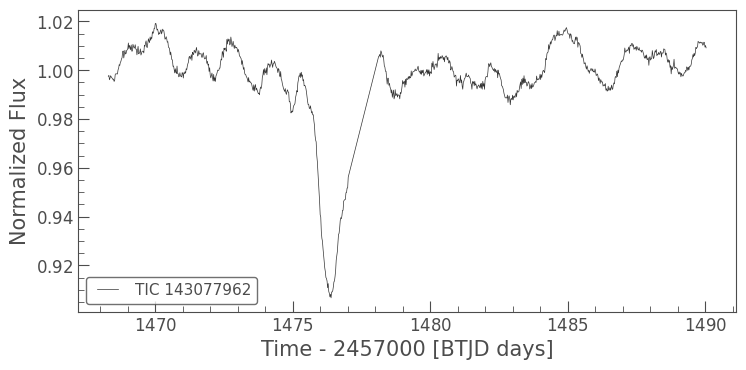

In [111]:
d.plot()

---

### Low asymmetry score

In [173]:
low_asym = data[(data.asym_score <= 0.5) & (data.asym_score > -2)].reset_index()

In [174]:
low_asym.head()

,index,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob
0,76,tesslc_280118008.pkl,-2.266950,-0.546998,1475.016115,0.197830,1.041646,0.320567,0.604172,-0.008378,0.077594,-1.040,27.376780,0.000000,maybeTransit
1,115,tesslc_307818711.pkl,-12.610291,-2.693304,1479.704108,0.458914,0.302008,0.379632,0.895838,-0.001663,0.140910,-0.307,-0.072358,142.546826,artefact
2,139,tesslc_247750416.pkl,-3.270324,-1.080022,1475.162485,0.244026,1.002863,0.411226,0.562491,-0.004271,0.079744,-0.753,14.753642,138.701253,maybeTransit
3,159,tesslc_369597090.pkl,-6.542314,-1.719936,1479.495485,0.246939,0.318254,0.044954,0.500003,-0.000837,0.116701,-0.608,-6.288861,35.742391,artefact
4,214,tesslc_43240348.pkl,-2.019448,-0.424785,1479.828476,0.239512,0.001525,3.397259,1.145837,-0.008746,0.099206,-0.879,20.547421,0.000000,artefact


280118008
. -2.26694989 -0.54699752 1475.016115 0.19782993 1.04164563 0.32056714 0.60417192 -0.00837819 0.07759421 -1.04 27.37678035 0.0 maybeTransit


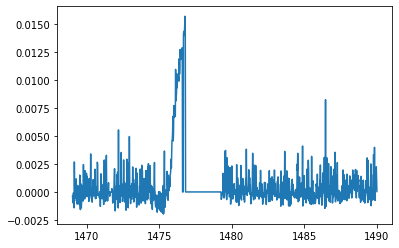

307818711
. -12.61029148 -2.69330365 1479.70410763 0.45891368 0.30200843 0.37963215 0.89583776 -0.0016626 0.14090975 -0.307 -0.07235876 142.54523637 artefact


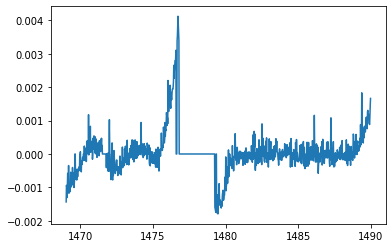

247750416
. -3.27032351 -1.08002187 1475.16248522 0.24402576 1.00286265 0.41122576 0.56249083 -0.00427143 0.07974446 -0.753 14.75364244 138.70125329 maybeTransit


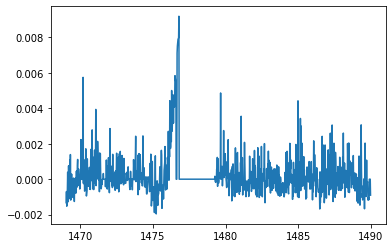

369597090
. -6.54231358 -1.71993647 1479.49548524 0.24693907 0.31825427 0.04495437 0.50000332 -0.00083698 0.11670124 -0.608 -6.28886116 35.74239122 artefact


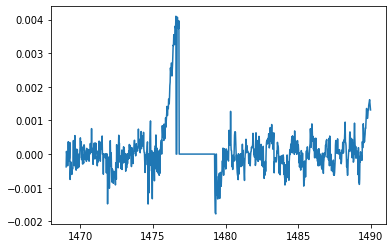

43240348
. -2.01944757 -0.42478479 1479.82847647 0.23951176 0.00210783 3.39728732 1.1458373 -0.00874568 0.09920568 -0.879 20.54729307 0.0 artefact


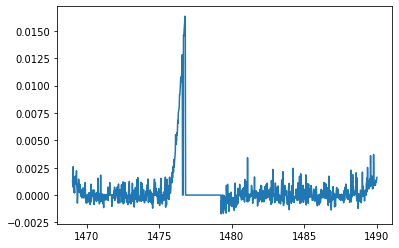

220054217
. -0.94307691 -0.33164095 1475.22452794 0.19157188 1.24776912 0.38784485 0.54165494 -0.01337619 0.03970393 -0.827 41.24712914 1.07e-06 maybeTransit


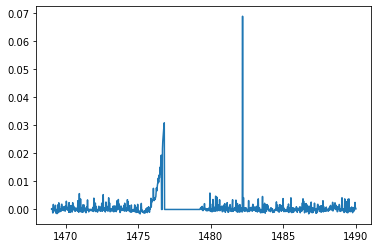

167176416
. -6.61592102 -1.5277015 1479.59990889 0.0550294 0.15559441 0.70105657 0.68749846 -0.00172348 0.12697768 -0.601 2.61080951 8.05697099 artefact


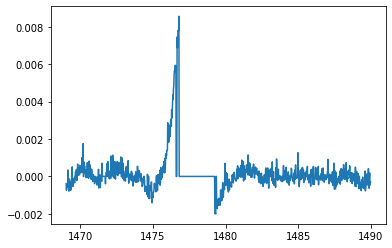

43247142
. -0.87703395 -0.23888914 1479.45359757 0.12154032 0.32550525 0.35649852 0.39583467 -0.00060262 0.09154059 -0.967 -4.2458306 531.86615375 artefact


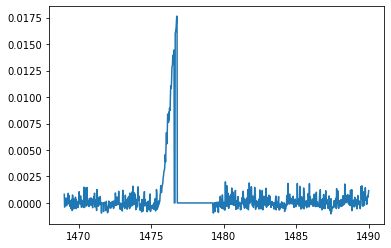

71916467
. -1.39554024 -0.40017299 1475.26593812 0.3704342 0.95833919 0.18141475 0.47916318 -0.00357337 0.06092897 -0.896 18.64533451 201391968.86719656 maybeTransit


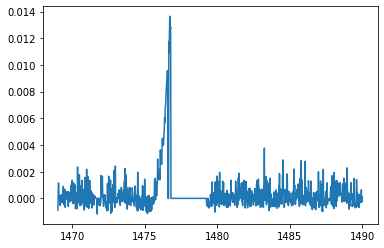

33552324
. -2.66398621 -0.72154206 1475.13997801 0.14404245 1.26125519 0.19755972 0.60416039 -0.00708762 0.06661532 -0.925 764978.92594443 0.0 maybeTransit


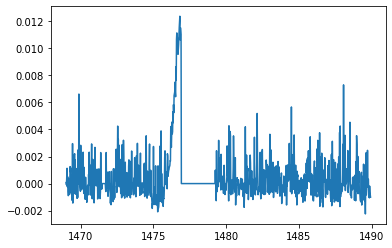

443121879
. -5.87909222 -1.96020353 1473.22414367 0.30544692 0.21093396 0.54875713 0.41666665 -6.92e-05 0.09007458 -0.318 0.23828173 16.07754174 maybeTransit


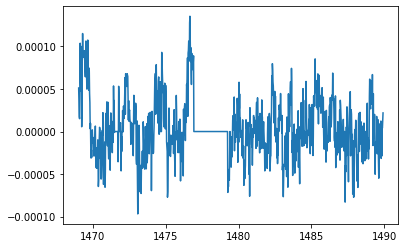

147799360
. -10.691576 -2.27506858 1479.61793884 0.10134948 0.01132224 0.72202002 0.75000483 -0.00137989 0.19358014 -0.404 -0.61413851 3.6814705 artefact


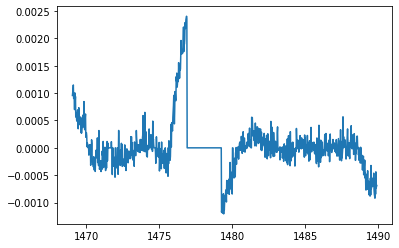

282494861
. -1.39605808 -0.40792614 1475.28721546 0.31836373 1.20064589 0.08583496 0.47916131 -0.00319297 0.0633706 -0.803 674.32855166 9294694530.851976 maybeTransit


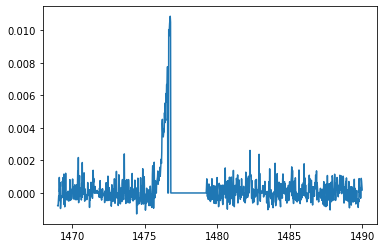

237696075
. -5.95248747 -1.37001239 1479.5579367 0.35250879 0.17583992 0.31188193 0.60417506 -0.00091136 0.1089526 -0.731 0.23085486 31.2009189 artefact


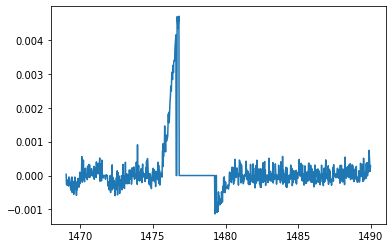

53493262
. -1.88843668 -0.40648599 1479.64111343 0.35655941 0.4160022 0.23145477 0.79167295 -0.00062734 0.11111946 -0.959 -0.70777236 15.40848649 artefact


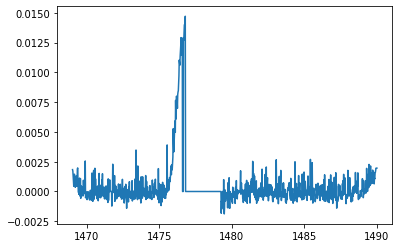

333252807
. -3.67668772 -1.24258373 1475.22383167 0.4285831 0.68074043 0.27869512 0.58333804 -0.00272577 0.04912943 -0.868 9.36270399 7.70541559 maybeTransit


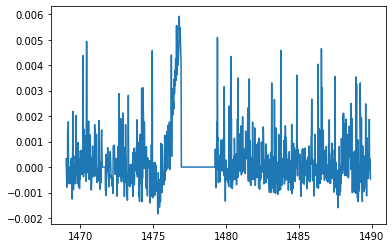

117816684
. -14.14694023 -4.12461697 1479.61841534 0.08168388 1.92e-06 0.41683175 0.7500029 -0.00375565 0.16065356 -0.271 -1.64989877 2.38990737 artefact


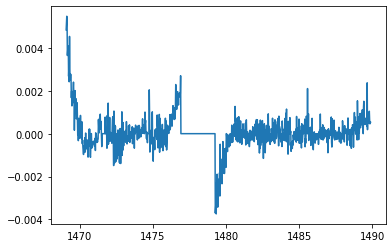

727601096
. -9.94370651 -3.94011943 1479.55231008 0.24220529 0.33451857 0.10949423 0.60416479 -0.00146644 0.05108582 -0.189 -23.59900648 383.86585861 artefact


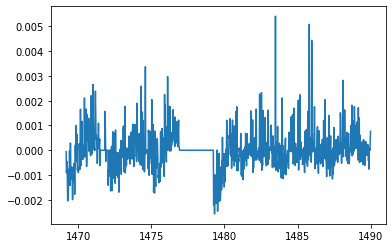

159086518
. -1.19574916 -0.33357729 1475.03722888 0.17989441 1.26319874 0.52709285 0.60415843 -0.00847848 0.05641496 -0.862 24.2525967 342.28295859 maybeTransit


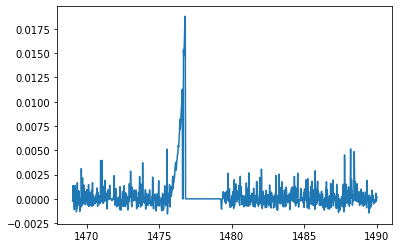

156149279
. -1.94523692 -0.57345947 1474.93321001 0.27026143 1.37649869 0.25436928 0.64582175 -0.00517409 0.05616602 -0.867 22.14929916 5279.21070243 maybeTransit


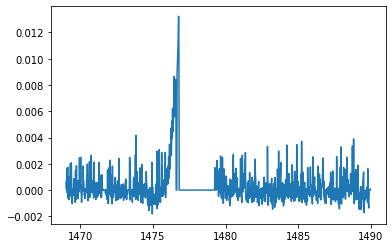

232504926
. -2.32462883 -0.88909325 1475.39133173 0.26690806 1.02554118 0.47055565 0.47916488 -0.00556015 0.051026 -0.87 28.86482007 1745.07774175 maybeTransit


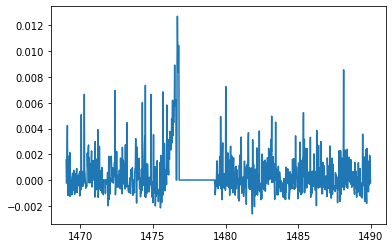

290166746
. -1.98133337 -0.60116608 1475.03727218 0.36695605 0.88846088 0.17501291 0.54165642 -0.00363249 0.055061 -0.829 23.73482661 0.0 maybeTransit


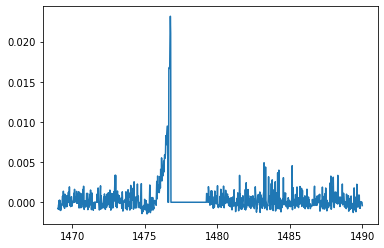

237639914
. -2.10772634 -0.62881474 1474.93291996 0.35071994 1.09308072 0.14660118 0.60417469 -0.00522537 0.05600286 -1.046 2906.96929842 54027455850.0469 maybeTransit


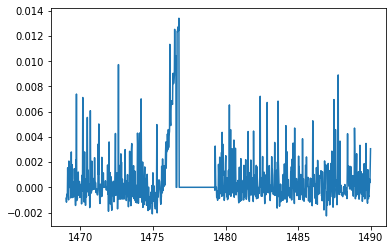

319434863
. -18.82154274 -4.73984955 1479.6584045 0.25431508 0.00394125 0.45703071 0.81250667 -0.00217155 0.16226678 0.847 0.02954799 1037.28110929 artefact


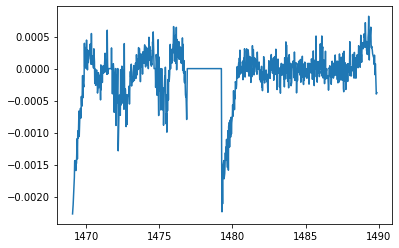

42076845
. -5.98561525 -1.26509772 1479.6826956 0.14869061 0.16419152 0.45096289 0.85416725 -0.00205969 0.13725109 -0.767 -4.40921075 4.79715845 artefact


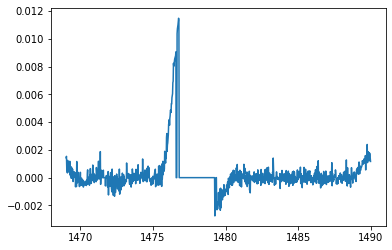

294093828
. -14.70437336 -3.59948469 1479.53276786 0.08698801 0.00608738 0.57958012 0.56250821 -0.00515755 0.2038581 -0.28 0.04987035 342.92414857 artefact


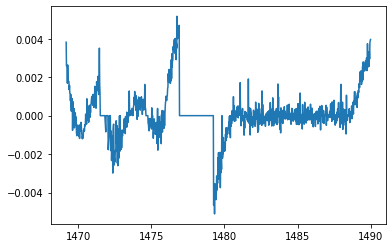

280114445
. -2.20935345 -0.55749893 1479.49529409 0.41734615 0.14894299 0.35640998 0.50000439 -0.00068324 0.09161378 -0.81 -44.11369155 699.85199921 artefact


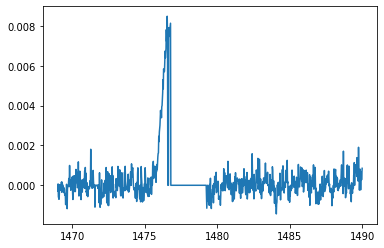

280296191
. -2.50924373 -0.77234813 1479.47435719 0.48158644 0.36459496 0.19524774 0.45833761 -0.00235136 0.07619354 -0.919 -170.48313102 143442.32211715 artefact


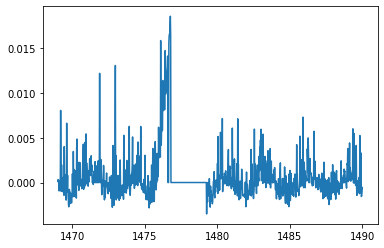

66736348
. -9.92136288 -2.88854345 1479.49508588 0.04384047 6e-08 0.33901196 0.47915971 -0.00213732 0.13653986 -0.328 -1.74904125 6.31046729 artefact


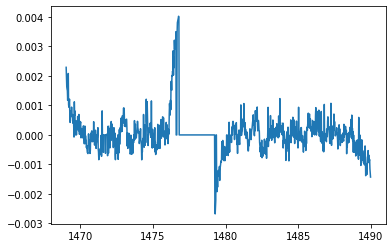

247841679
. -2.01159644 -0.66248657 1475.30831349 0.35320937 1.51518179 0.10737702 0.52082534 -0.0045883 0.0571387 -0.921 32.20638403 0.0 maybeTransit


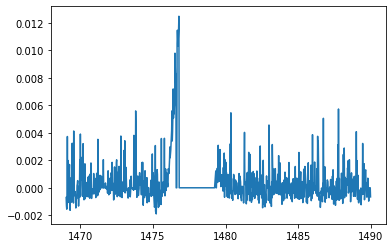

In [177]:
for i in range(len(low_asym.head(30))):    
    lc_path = glob.glob(os.path.join(path,f"**/{low_asym.file[i]}"))[0]
    lc, lc_info = import_XRPlightcurve(lc_path,sector=6)
    print(lc_info[0])
    lc = lc['time','corrected flux','quality','flux error']
    results, data_arrays = processing(lc, lc_info=lc_info,method='median')
    plt.plot(data_arrays[0], data_arrays[1])
    plt.show()

In [181]:
import eleanor

In [188]:
star = eleanor.Source(tic=280114445, sector=6)

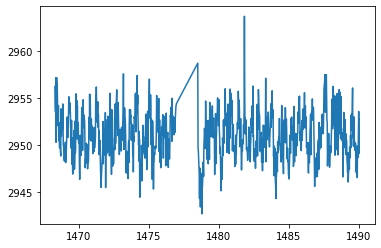

In [189]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True, regressors='corner')
q = data.quality == 0
plt.plot(data.time[q],data.corr_flux[q])

### snr vs skewness

(-10.0, 10.0)

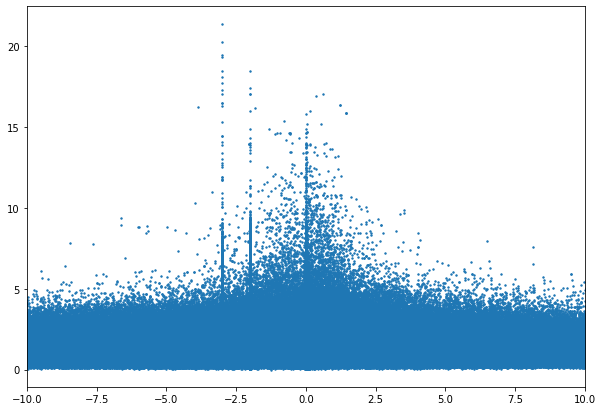

In [121]:
plt.figure(figsize=(10,7))
plt.scatter(data.skewness,abs(data.snr),s=2)
plt.xlim(-10, 10)


In [132]:
data.loc[(data.asym_score >=1) & (data.skewness <=5)]

,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob
12,tesslc_177385610.pkl,-9.012163,-1.981583,1475.281103,1.007709,0.609618,0.055080,0.937508,-0.001860,0.094777,-0.658,-5.597833,6.581679,maybeTransit
13,tesslc_30946593.pkl,-1.228684,-0.275237,1483.868401,1.008433,0.700159,0.080954,0.916646,-0.000709,0.081385,-0.924,-9.432455,15.031905,maybeTransit
19,tesslc_382244269.pkl,-2.994229,-2.545662,1475.449113,1.005202,0.099755,0.015047,0.187498,-0.002013,0.016266,-0.713,-7.867938,27.003994,maybeTransit
22,tesslc_53244920.pkl,-6.906629,-1.825680,1475.036949,1.005583,0.176113,0.248713,0.645838,-0.009077,0.296515,-0.595,3.093678,3.316638,maybeTransit
23,tesslc_31281610.pkl,-2.361898,-0.588298,1475.243636,1.000198,0.427615,0.076026,0.749986,-0.000560,0.063873,-0.887,2.917366,14.667015,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723697,tesslc_172832345.pkl,-2.290478,-0.562556,1474.743780,1.021555,1.309516,0.719473,0.708342,-0.005341,0.089437,-0.952,-2.585559,0.370978,maybeTransit
1723698,tesslc_365637343.pkl,-2.006794,-0.660400,1475.058045,1.094436,0.996594,0.214160,0.437489,-0.003325,0.057300,-0.878,-6.018257,1.824862,maybeTransit
1723702,tesslc_339772767.pkl,-2.884365,-2.373046,1479.386775,1.058397,0.100878,0.115348,0.145836,-0.001881,0.027273,-0.778,-18.961097,42.333527,artefact
1723704,tesslc_279996215.pkl,-1.873854,-0.461817,1475.036786,1.001398,0.001267,0.003112,0.645839,-0.000143,0.070257,-0.829,-2.872635,35.595155,maybeTransit


---

## Skew vs alpha

In [143]:
high_snr = data.loc[abs(data.snr) >= 1]

In [144]:
len(high_snr)

1176107

Text(0, 0.5, 'skewness')

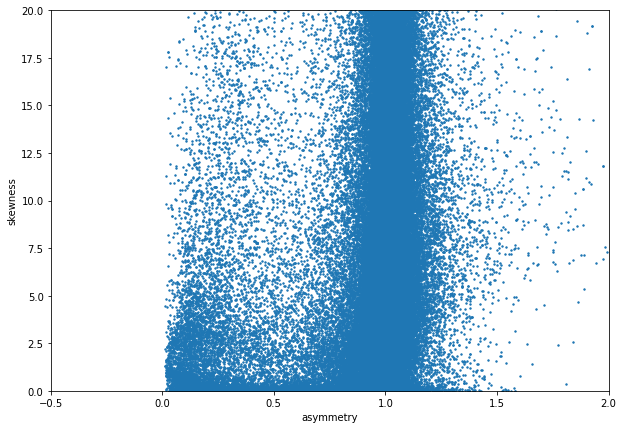

In [154]:
plt.figure(figsize=(10,7))
plt.scatter(high_snr.asym_score,abs(high_snr.skewness),s=2)
plt.ylim(-0,20)
plt.xlim(-0.5,2)
plt.xlabel("asymmetry")
plt.ylabel("skewness")